In [1]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import numpy as np

diabetes = load_diabetes()
X = diabetes.data[:, np.newaxis, 2]  # Select BMI feature and reshape
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (353, 1)
Shape of X_test: (89, 1)
Shape of y_train: (353,)
Shape of y_test: (89,)


In [2]:
def hypothesis(X, theta):
    """Calculates the predicted values using the linear hypothesis function."""
    return X @ theta

def compute_cost(X, y, theta):
    """Calculates the Mean Squared Error cost."""
    m = len(y)
    predictions = hypothesis(X, theta)
    cost = (1/(2*m)) * np.sum((predictions - y)**2)
    return cost

def gradient_descent(X, y, theta, alpha, num_iterations):
    """Implements the Batch Gradient Descent algorithm."""
    m = len(y)
    cost_history = []

    for i in range(num_iterations):
        predictions = hypothesis(X, theta)
        errors = predictions - y
        gradient = (1/m) * X.T @ errors
        theta -= alpha * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

    return theta, cost_history

# Add a column of ones to X for the intercept term
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]

# Initialize parameters
theta_initial = np.zeros((X_train_b.shape[1], 1))

# Set hyperparameters
alpha = 0.01  # Learning rate
num_iterations = 1000

# Run Gradient Descent
theta_gd, cost_history = gradient_descent(X_train_b, y_train.reshape(-1, 1), theta_initial, alpha, num_iterations)

print("Learned parameters (theta) from Gradient Descent:")
print(theta_gd)
print("Final cost from Gradient Descent:", cost_history[-1])

Learned parameters (theta) from Gradient Descent:
[[153.69503863]
 [ 22.27006123]]
Final cost from Gradient Descent: 2989.19073688118


In [3]:
# Check if the column of ones has been added to X_train_b
if X_train_b.shape[1] == 1:
    # Add a column of ones to X_train if it hasn't been done already
    X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]

# Ensure y_train is in the correct shape for matrix multiplication
y_train_reshaped = y_train.reshape(-1, 1)

# Calculate the optimal parameters theta_ne using the Normal Equation formula
theta_ne = np.linalg.inv(X_train_b.T @ X_train_b) @ X_train_b.T @ y_train_reshaped

# Print the calculated parameters theta_ne
print("Optimal parameters (theta) from Normal Equation:")
print(theta_ne)

Optimal parameters (theta) from Normal Equation:
[[152.00335421]
 [998.57768914]]


In [4]:
from sklearn.metrics import mean_squared_error

# Add a column of ones to X_test for the intercept term
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Make predictions on X_test_b using parameters from Gradient Descent
y_pred_gd = hypothesis(X_test_b, theta_gd)

# Make predictions on X_test_b using parameters from Normal Equation
y_pred_ne = hypothesis(X_test_b, theta_ne)

# Calculate Mean Squared Error for Gradient Descent model
mse_gd = mean_squared_error(y_test, y_pred_gd)

# Calculate Mean Squared Error for Normal Equation model
mse_ne = mean_squared_error(y_test, y_pred_ne)

# Print the calculated MSE for both models
print("Mean Squared Error (Gradient Descent):", mse_gd)
print("Mean Squared Error (Normal Equation):", mse_ne)

Mean Squared Error (Gradient Descent): 5280.07025837677
Mean Squared Error (Normal Equation): 4061.8259284949268


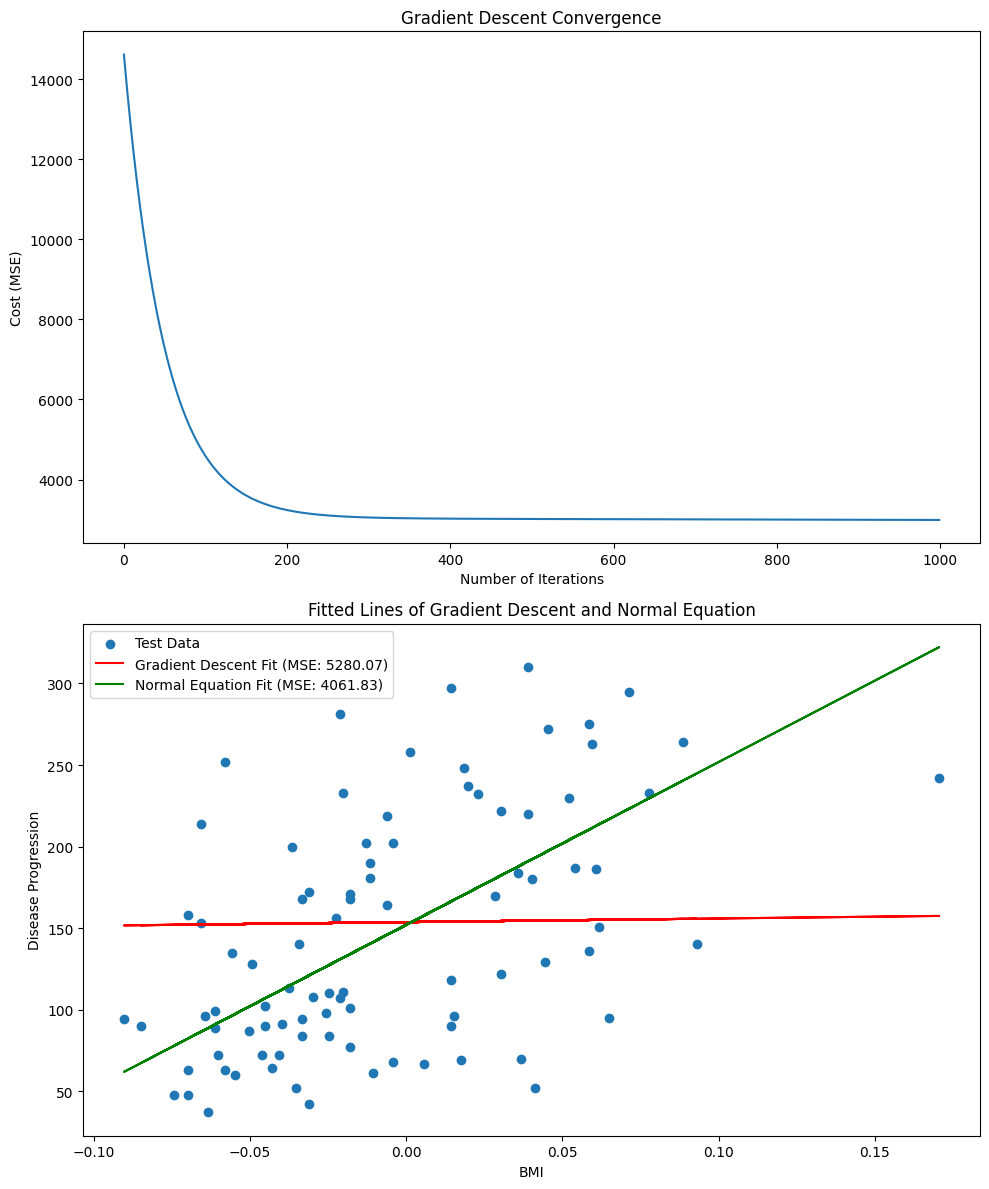

In [5]:
import matplotlib.pyplot as plt

# Ensure y_test is a 1D array for plotting
y_test_1d = y_test.ravel()

# Ensure y_pred_gd and y_pred_ne are 1D arrays for plotting
y_pred_gd_1d = y_pred_gd.ravel()
y_pred_ne_1d = y_pred_ne.ravel()

# Create a figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Plot Gradient Descent Convergence (Cost History)
axes[0].plot(range(num_iterations), cost_history)
axes[0].set_xlabel('Number of Iterations')
axes[0].set_ylabel('Cost (MSE)')
axes[0].set_title('Gradient Descent Convergence')

# Plot Fitted Lines and Test Data
axes[1].scatter(X_test, y_test_1d, label='Test Data')
axes[1].plot(X_test, y_pred_gd_1d, color='red', label=f'Gradient Descent Fit (MSE: {mse_gd:.2f})')
axes[1].plot(X_test, y_pred_ne_1d, color='green', label=f'Normal Equation Fit (MSE: {mse_ne:.2f})')
axes[1].set_xlabel('BMI')
axes[1].set_ylabel('Disease Progression')
axes[1].set_title('Fitted Lines of Gradient Descent and Normal Equation')
axes[1].legend()

# Adjust layout and display plots
plt.tight_layout()
plt.show()

In [7]:
# Print the learned parameters
print("Gradient Descent (theta_gd):")
print(theta_gd)
print("\nNormal Equation (theta_ne):")
print(theta_ne)

# Print the Mean Squared Error values
print("\n--- Evaluation Metrics (Mean Squared Error) ---")
print(f"Mean Squared Error (Gradient Descent): {mse_gd:.4f}")
print(f"Mean Squared Error (Normal Equation): {mse_ne:.4f}")

Gradient Descent (theta_gd):
[[153.69503863]
 [ 22.27006123]]

Normal Equation (theta_ne):
[[152.00335421]
 [998.57768914]]

--- Evaluation Metrics (Mean Squared Error) ---
Mean Squared Error (Gradient Descent): 5280.0703
Mean Squared Error (Normal Equation): 4061.8259
